In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

from kernels_class import *
from rbf_kernel import *
from generation import *

In [2]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [50, 100, 250, 500, 750, 1000, 1500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [3]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [4]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf'])

100%|██████████| 3500/3500 [05:03<00:00, 11.54it/s] 


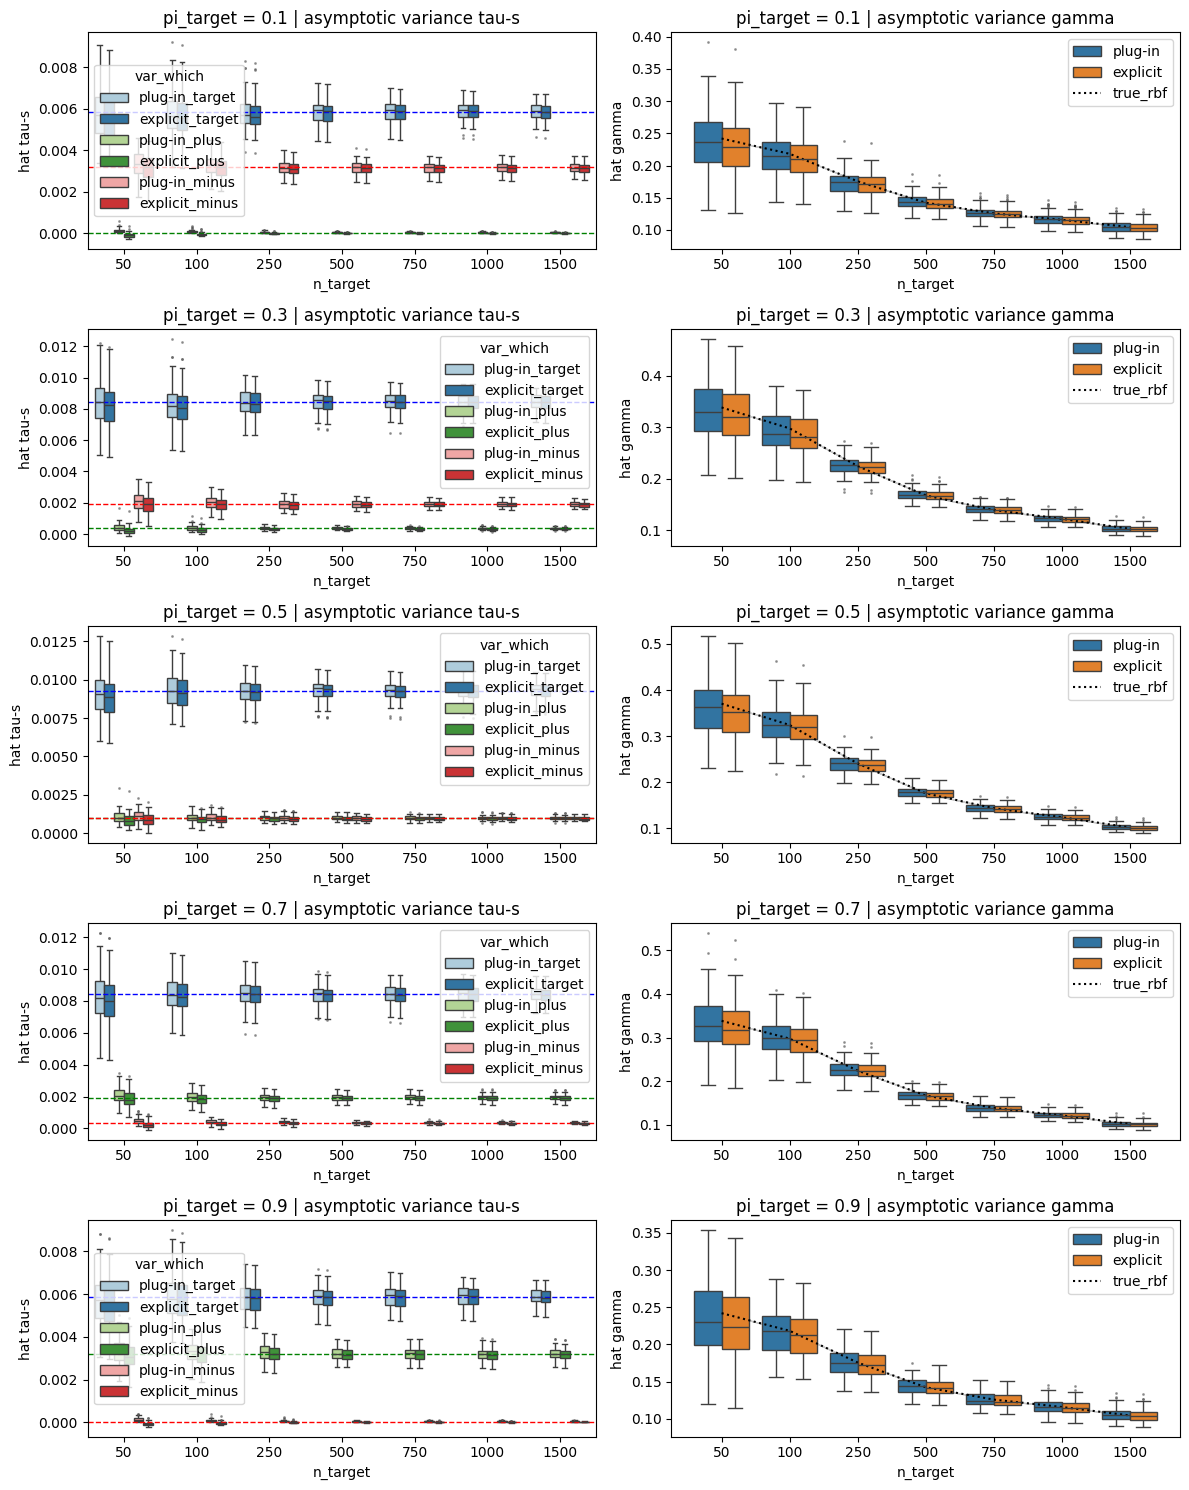

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='darkgray', alpha=0.5)

n_which = 'n_target'
p_seq = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in range(5):

    df = copy(res[res['pi_target'] == p_seq[i]])
    df.pop('var_plug-in')
    df.pop('var_explicit')
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in_target|explicit_target|plug-in_plus|plug-in_minus|explicit_plus|explicit_minus)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)
    df['var_which'] = pd.Categorical(df['var_which'], 
                                    categories=['plug-in_target','explicit_target', 
                                                'plug-in_plus','explicit_plus',
                                                'plug-in_minus','explicit_minus'],
                                    ordered=True)

    palette = {'plug-in_target': '#1f77b4', 'plug-in_minus': "#1bc231", 'plug-in_plus': "#10f7ff",
                'explicit_target': "#ff0e0e", 'explicit_minus': "#fffc2d", 'explicit_plus': "#f57812"} 

    sns.boxplot(data=df,  y='var', hue='var_which', x=n_which, palette="Paired", ax=axes[i,0],flierprops=flierprops)

    axes[i,0].axhline(y=df.loc[0,'var_target_rbf'], color='blue', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_plus_rbf'], color='green', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_minus_rbf'], color='red', linestyle='--', linewidth=1)


    df=copy(res[res['pi_target'] == p_seq[i]])
    df = df[[n_which, 'var_plug-in', 'var_explicit', 'var_rbf']]
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in|explicit)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)

    palette = {'plug-in': '#1f77b4',
                'explicit': "#ff0e0e"} 

    sns.boxplot(data=df,  y='var', x=n_which, hue='var_which', ax=axes[i,1],flierprops=flierprops)
    sns.lineplot(data=df, x=n_which, y='var_rbf', linestyle='dotted',color='black', ax=axes[i,1], label='true_rbf')

    axes[i,0].set_title('pi_target = '+str(p_seq[i])+' | asymptotic variance tau-s')
    axes[i,1].set_title('pi_target = '+str(p_seq[i])+' | asymptotic variance gamma')
    axes[i,0].set_ylabel('hat tau-s')
    axes[i,1].set_ylabel('hat gamma')
    # axes[i,1]

plt.tight_layout()

plt.show()

In [4]:
params = {'beta': [1],
          'n_plus': [50, 100, 250, 500, 750, 1000, 1500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [5]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [6]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf'])

100%|██████████| 3500/3500 [04:19<00:00, 13.51it/s]


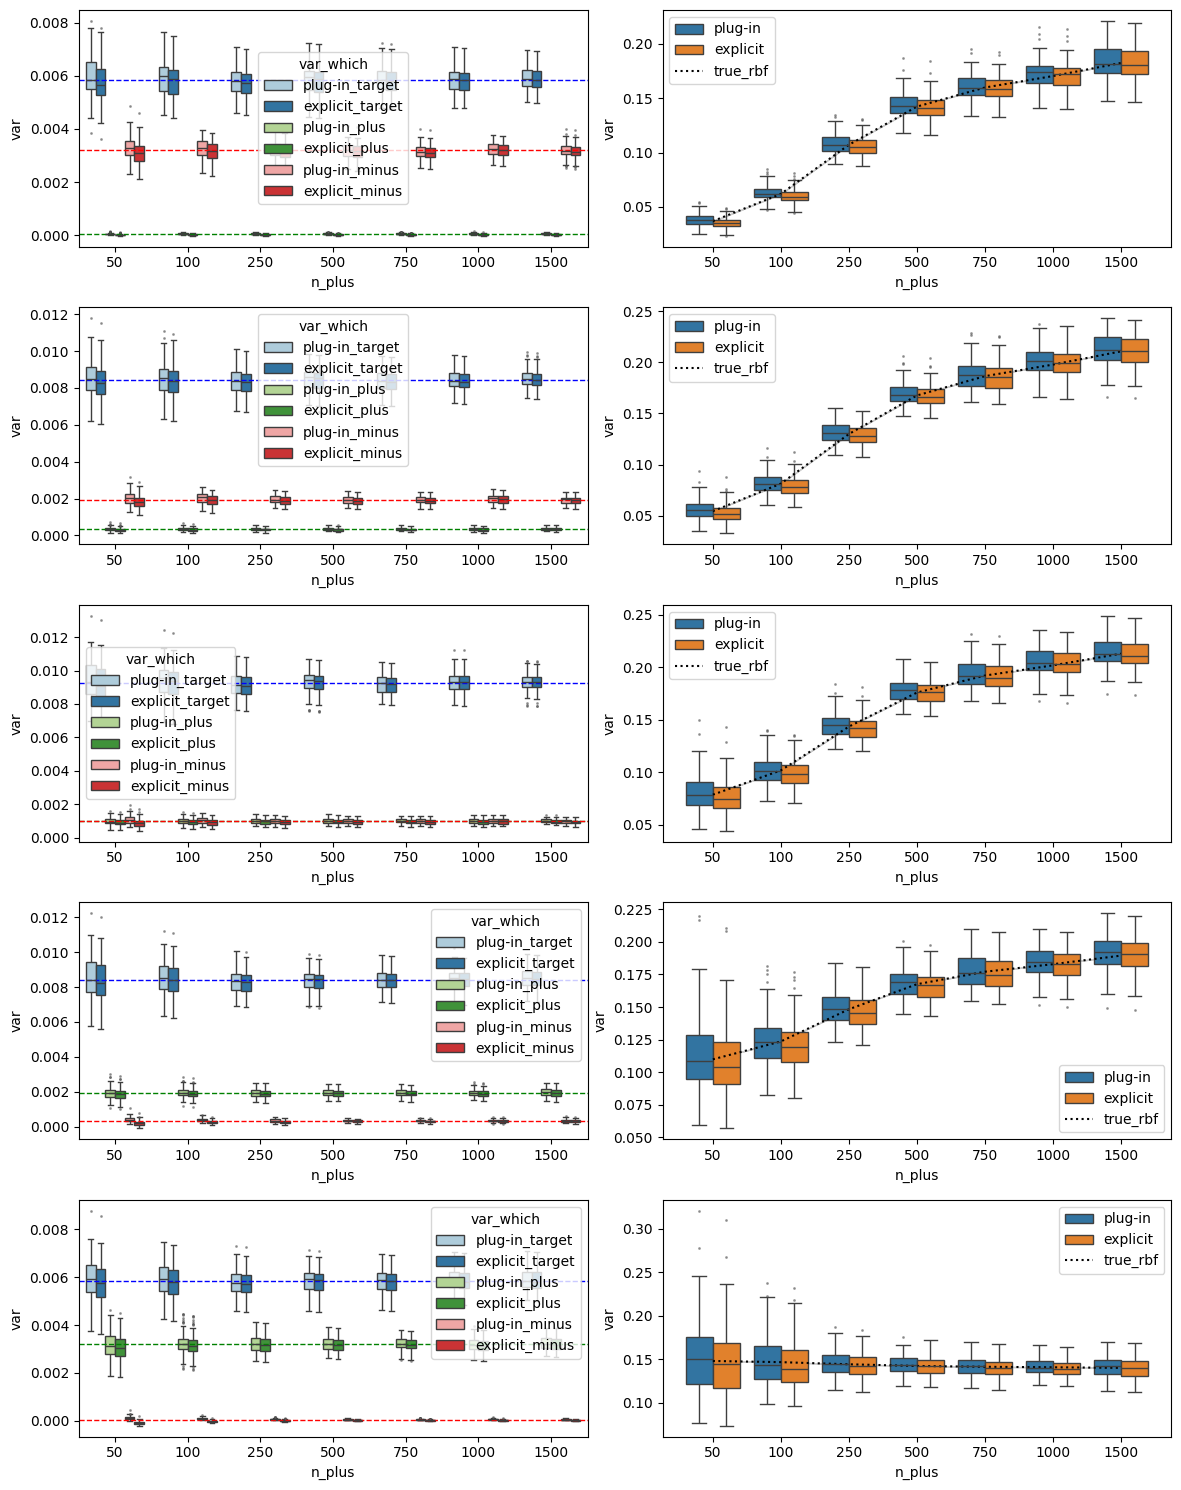

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='darkgray', alpha=0.5)

n_which = 'n_plus'
p_seq = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in range(5):

    df = copy(res[res['pi_target'] == p_seq[i]])
    df.pop('var_plug-in')
    df.pop('var_explicit')
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in_target|explicit_target|plug-in_plus|plug-in_minus|explicit_plus|explicit_minus)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)
    df['var_which'] = pd.Categorical(df['var_which'], 
                                    categories=['plug-in_target','explicit_target', 
                                                'plug-in_plus','explicit_plus',
                                                'plug-in_minus','explicit_minus'],
                                    ordered=True)

    palette = {'plug-in_target': '#1f77b4', 'plug-in_minus': "#1bc231", 'plug-in_plus': "#10f7ff",
                'explicit_target': "#ff0e0e", 'explicit_minus': "#fffc2d", 'explicit_plus': "#f57812"} 

    sns.boxplot(data=df,  y='var', hue='var_which', x=n_which, palette="Paired", ax=axes[i,0],flierprops=flierprops)

    axes[i,0].axhline(y=df.loc[0,'var_target_rbf'], color='blue', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_plus_rbf'], color='green', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_minus_rbf'], color='red', linestyle='--', linewidth=1)


    df=copy(res[res['pi_target'] == p_seq[i]])
    df = df[[n_which, 'var_plug-in', 'var_explicit', 'var_rbf']]
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in|explicit)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)

    palette = {'plug-in': '#1f77b4',
                'explicit': "#ff0e0e"} 

    sns.boxplot(data=df,  y='var', x=n_which, hue='var_which', ax=axes[i,1],flierprops=flierprops)
    sns.lineplot(data=df, x=n_which, y='var_rbf', linestyle='dotted',color='black', ax=axes[i,1], label='true_rbf')

plt.tight_layout()

plt.show()

In [26]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [50, 100, 250, 500, 750, 1000, 1500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [27]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf'])

100%|██████████| 3500/3500 [03:33<00:00, 16.39it/s]


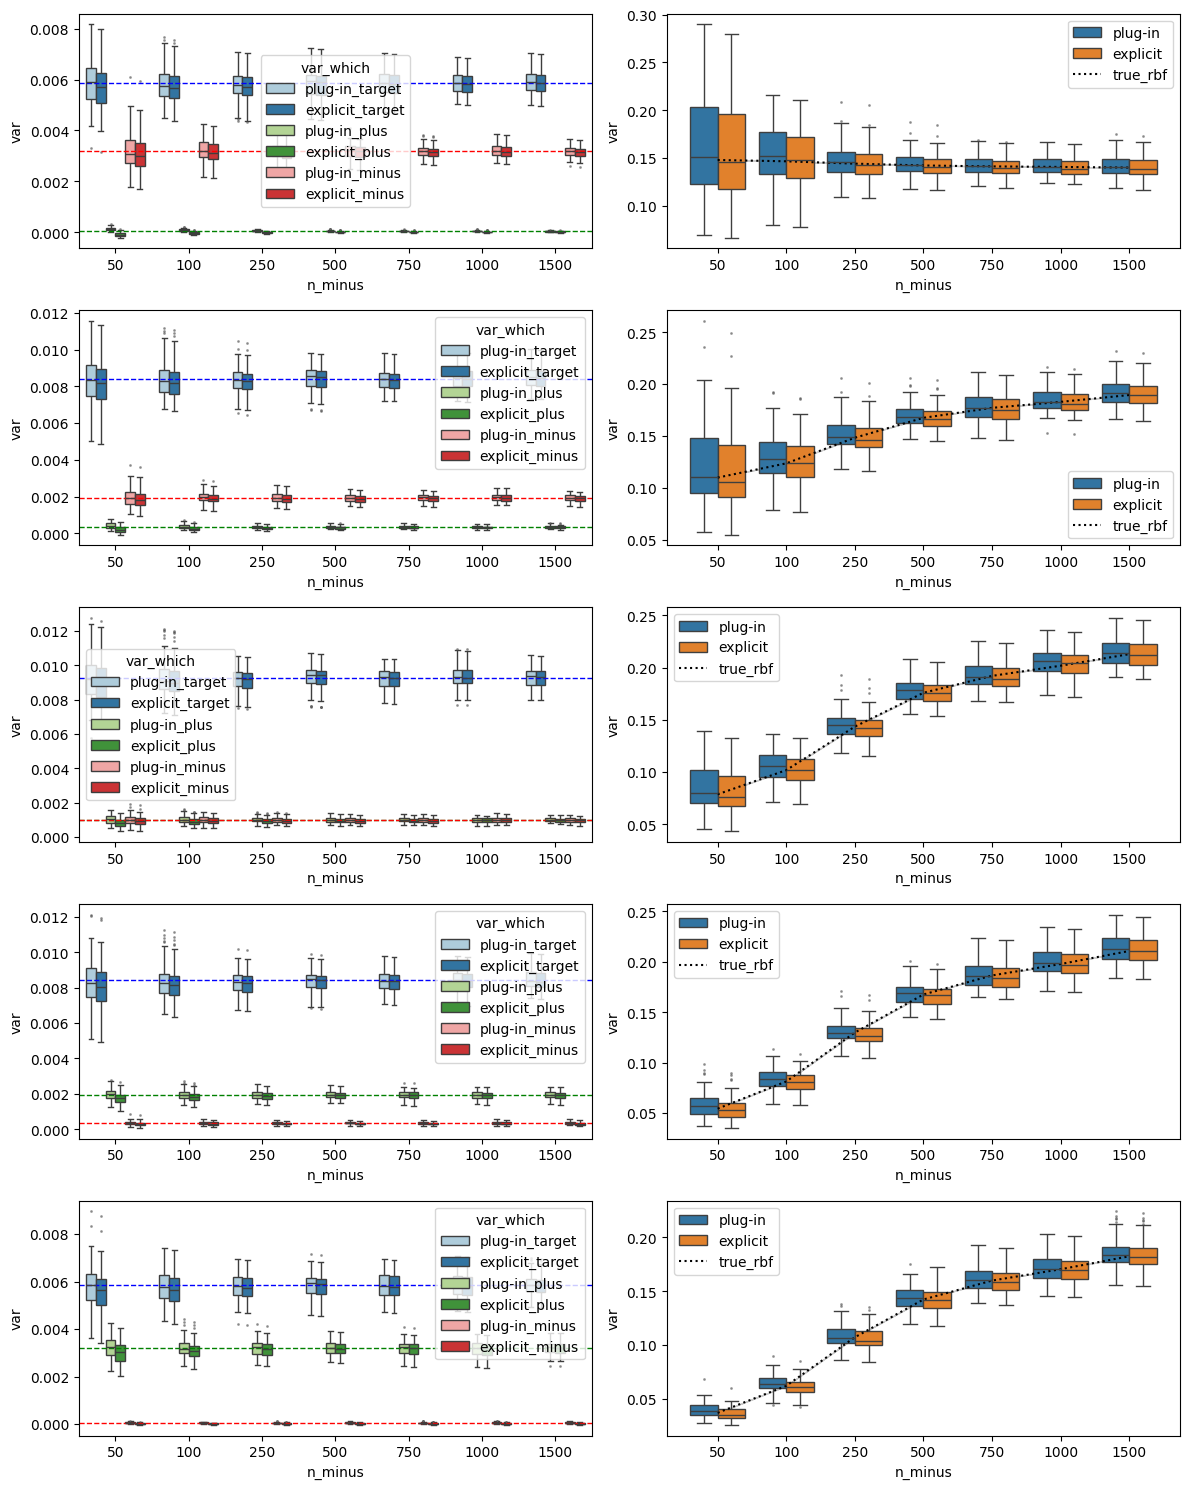

In [28]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='darkgray', alpha=0.5)

n_which = 'n_minus'
p_seq = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in range(5):

    df = copy(res[res['pi_target'] == p_seq[i]])
    df.pop('var_plug-in')
    df.pop('var_explicit')
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in_target|explicit_target|plug-in_plus|plug-in_minus|explicit_plus|explicit_minus)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)
    df['var_which'] = pd.Categorical(df['var_which'], 
                                    categories=['plug-in_target','explicit_target', 
                                                'plug-in_plus','explicit_plus',
                                                'plug-in_minus','explicit_minus'],
                                    ordered=True)

    palette = {'plug-in_target': '#1f77b4', 'plug-in_minus': "#1bc231", 'plug-in_plus': "#10f7ff",
                'explicit_target': "#ff0e0e", 'explicit_minus': "#fffc2d", 'explicit_plus': "#f57812"} 

    sns.boxplot(data=df,  y='var', hue='var_which', x=n_which, palette="Paired", ax=axes[i,0],flierprops=flierprops)

    axes[i,0].axhline(y=df.loc[0,'var_target_rbf'], color='blue', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_plus_rbf'], color='green', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_minus_rbf'], color='red', linestyle='--', linewidth=1)


    df=copy(res[res['pi_target'] == p_seq[i]])
    df = df[[n_which, 'var_plug-in', 'var_explicit', 'var_rbf']]
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in|explicit)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)

    palette = {'plug-in': '#1f77b4',
                'explicit': "#ff0e0e"} 

    sns.boxplot(data=df,  y='var', x=n_which, hue='var_which', ax=axes[i,1],flierprops=flierprops)
    sns.lineplot(data=df, x=n_which, y='var_rbf', linestyle='dotted',color='black', ax=axes[i,1], label='true_rbf')

plt.tight_layout()

plt.show()

In [40]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [50, 100, 250, 500, 750, 1000, 1500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}


In [41]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())
df_params['n_plus'] = df_params['n_target']
df_params['n_minus'] = df_params['n_target']

In [42]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf'])

100%|██████████| 3500/3500 [06:12<00:00,  9.38it/s] 


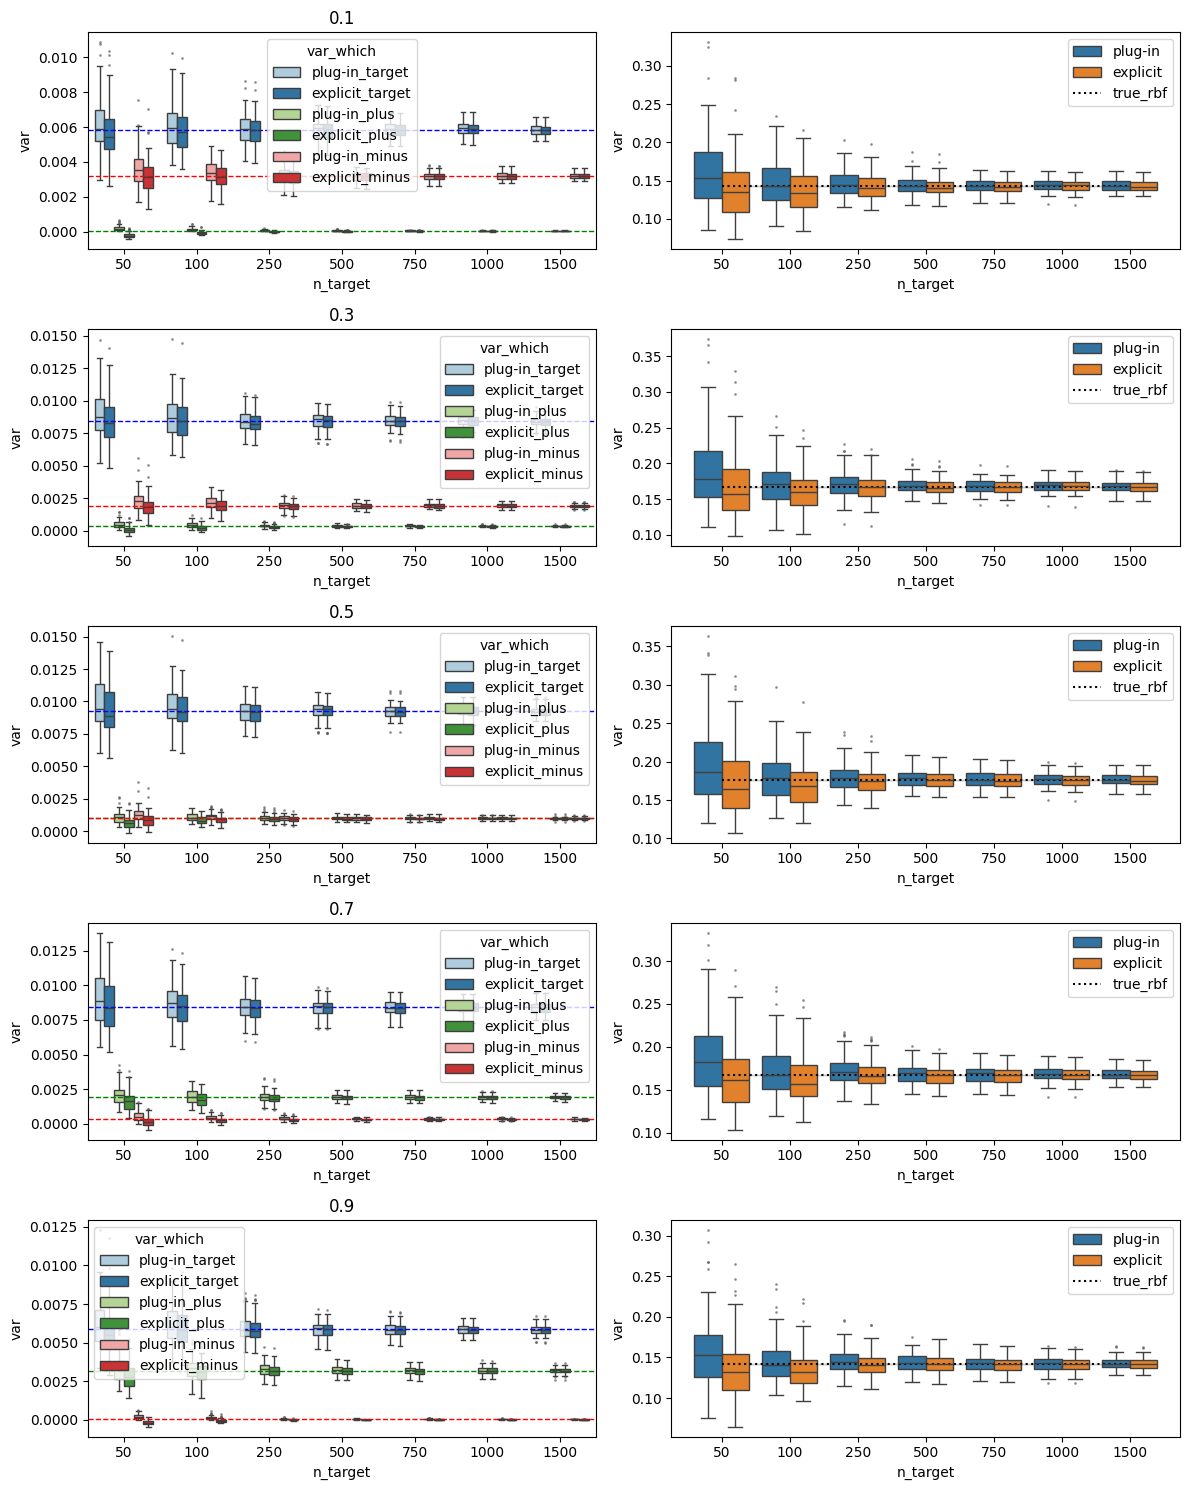

In [43]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='darkgray', alpha=0.5)

n_which = 'n_target'
p_seq = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in range(5):

    df = copy(res[res['pi_target'] == p_seq[i]])
    df.pop('var_plug-in')
    df.pop('var_explicit')
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in_target|explicit_target|plug-in_plus|plug-in_minus|explicit_plus|explicit_minus)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)
    df['var_which'] = pd.Categorical(df['var_which'], 
                                    categories=['plug-in_target','explicit_target', 
                                                'plug-in_plus','explicit_plus',
                                                'plug-in_minus','explicit_minus'],
                                    ordered=True)

    palette = {'plug-in_target': '#1f77b4', 'plug-in_minus': "#1bc231", 'plug-in_plus': "#10f7ff",
                'explicit_target': "#ff0e0e", 'explicit_minus': "#fffc2d", 'explicit_plus': "#f57812"} 

    sns.boxplot(data=df,  y='var', hue='var_which', x=n_which, palette="Paired", ax=axes[i,0],flierprops=flierprops)

    axes[i,0].axhline(y=df.loc[0,'var_target_rbf'], color='blue', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_plus_rbf'], color='green', linestyle='--', linewidth=1)
    axes[i,0].axhline(y=df.loc[0,'var_minus_rbf'], color='red', linestyle='--', linewidth=1)
    axes[i,0].set_title(p_seq[i])


    df=copy(res[res['pi_target'] == p_seq[i]])
    df = df[[n_which, 'var_plug-in', 'var_explicit', 'var_rbf']]
    df["id"] = df.index

    df = pd.wide_to_long(df, stubnames=['var'], i='id', j='var_which', sep="_",
                        suffix=r'(plug-in|explicit)')
    df = df.reset_index()

    df[n_which] = pd.Categorical(df[n_which].astype(str), 
                                    categories=list(map(str,sorted(df[n_which].astype(int).unique()))),
                                    ordered=True)

    palette = {'plug-in': '#1f77b4',
                'explicit': "#ff0e0e"} 

    sns.boxplot(data=df,  y='var', x=n_which, hue='var_which', ax=axes[i,1],flierprops=flierprops)
    sns.lineplot(data=df, x=n_which, y='var_rbf', linestyle='dotted',color='black', ax=axes[i,1], label='true_rbf')

plt.tight_layout()

plt.show()